In [2]:
import numpy as np
import matplotlib.pyplot as plt

# 12 - Anomaly Detection

In anomaly detection, the goal is to find points that do not conform to normal patterns or behaviour. 
Often, anomalous points  are known as **outliers**, since on a scatter plot of the data, they lie far away from other data points.

To identify outliers (anomalies), we need to define a function (the anomaly score function) that calculates how anomalous each point is.

## 12.1 Distance-based Anomaly Score

Let us generate a dataset with three outliers

Text(6, 10, 'outlier')

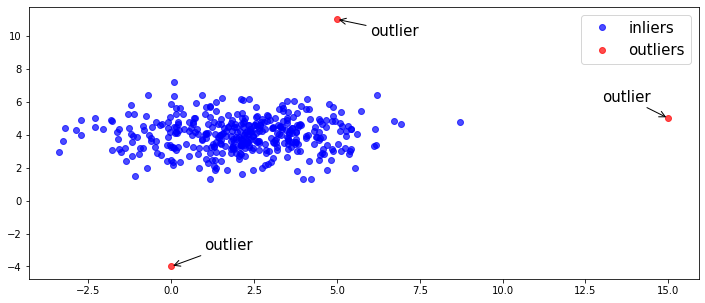

In [797]:
# inliers
m = 400
Xin = np.random.randn(m,2)*[2,1] + [2,4] # points
yin = np.zeros(m) # labels
# outliers
Xout = np.array([[0,-4],[15,5],[5,11]]) # points
yout = np.ones(3) # labels

# inliers + outliers
X = np.vstack((Xin,Xout)) 
y = np.concatenate((yin,yout)) # label vector: not an outlier = 0; an outlier = 1
# Plot dataset. Use a different color for outliers
plt.figure(figsize = (12,5))
plt.plot(Xin[:,0],Xin[:,1],'bo',alpha=0.7, label='inliers') # plot inliears
plt.plot(Xout[:,0],Xout[:,1],'ro',alpha=0.7, label='outliers') # plot outliers
plt.legend(fontsize=15)
# Annotate the plot
plt.annotate('outlier', 
             xy = Xout[0],
             xytext = Xout[0]+[1,1],
             fontsize=15,
             arrowprops = dict(arrowstyle="->"))
plt.annotate('outlier', 
             xy = Xout[1],
             xytext = Xout[1]+[-2,1],
             fontsize=15,
             arrowprops = dict(arrowstyle="->"))
plt.annotate('outlier', 
             xy = Xout[2],
             xytext = Xout[2]+[1,-1],
             fontsize=15,
             arrowprops = dict(arrowstyle="->"))

Let us denote by $\mu_i$ and $\sigma_i$ the mean and standard deviation of feature $i$.

In [736]:
'empirical means and standard deviations'
means = np.mean(X,axis=0)
stds = np.std(X,axis=0)

In [737]:
means

array([1.94223409, 4.05331897])

In [738]:
stds

array([2.18715805, 1.14556311])

We can define the anomaly score of a point $x=\begin{bmatrix} x_1 & x_2 & \cdots & x_n \end{bmatrix}$ as the "distance from $x$ to the mean relative to the standard deviations"

$$
\mbox{anomaly score of $x$}=\sqrt{\sum_{i=1}^n \frac{(x_i-\mu_i)^2}{\sigma_i^2}}
$$

For example, the anomaly score of X[23] (an inlier) is

In [743]:
'anomaly score of X[23]'
x = X[23]
z = (x-means)/stds
score = np.linalg.norm(z)
score

2.0520151475271935

an the anomaly score of X[402] (one of the three outliers) is

In [742]:
'anomaly score of X[402]'
x = X[402]
z = (x-means)/stds
score = np.linalg.norm(z)
score

6.223062514477786

The anomaly score of X[402] is larger than the anomaly score of X[23].

In [5]:
def anomalyScores_distance(X):
    means = np.mean(X,axis=0)
    stds = np.std(X,axis=0)
    
    dim = len(X.shape)
    if dim==1: # to handle datasets with only one point
        X = X[None,:]
    
    Z = (X-means)/stds
    scores = np.linalg.norm(Z,axis=1)
    # scale the scores so that they are within a zero to one range
    scores = (scores-np.min(scores))/(np.max(scores)-np.min(scores))
    return scores

Let us compute the anomaly scores of the dataset

In [799]:
scores = anomalyScores_distance(X)

Text(6, 10, 'outlier')

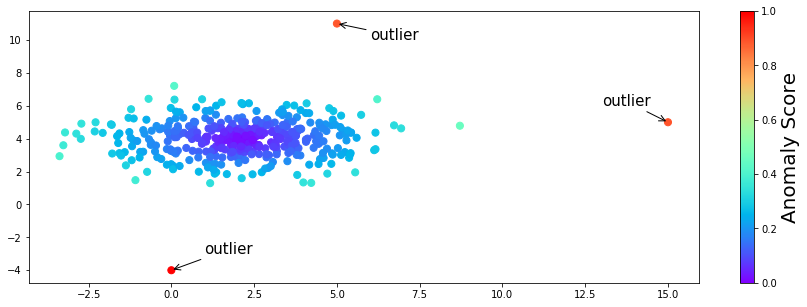

In [800]:
plt.figure(figsize = (15,5))
plt.scatter(X[:,0],X[:,1],s=50,c=scores, cmap=plt.cm.rainbow)
cbar = plt.colorbar()
cbar.set_label('Anomaly Score',fontsize=20)

plt.annotate('outlier', 
             xy = Xout[0],
             xytext = Xout[0]+[1,1],
             fontsize=15,
             arrowprops = dict(arrowstyle="->"))
plt.annotate('outlier', 
             xy = Xout[1],
             xytext = Xout[1]+[-2,1],
             fontsize=15,
             arrowprops = dict(arrowstyle="->"))
plt.annotate('outlier', 
             xy = Xout[2],
             xytext = Xout[2]+[1,-1],
             fontsize=15,
             arrowprops = dict(arrowstyle="->"))

Notice that the outliers receive large anomaly scores and the inliers receive low anomaly scores

## 12.2 Covariance-based Anomaly Score

The anomalyScores_distance function performs poorly if there are correlations between the features.
To illustrate this, let us generate a dataset from a Gaussian distribution with a nondiagonal covariance matrix (so that the features are correlated).

Text(2.5, 9.0, 'outlier')

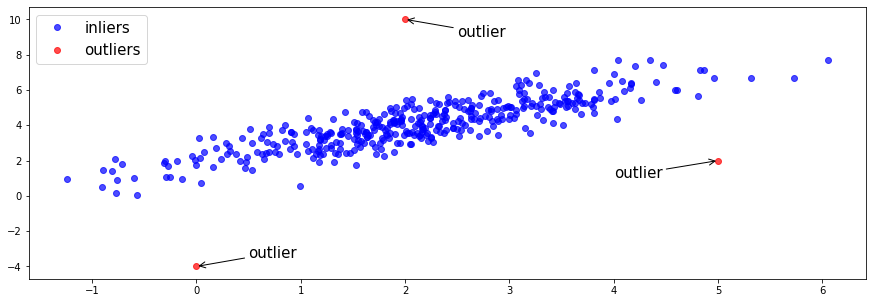

In [3]:
#inliers
mean = np.array([2,4])
cov = np.array([[1.5, 1.5],[1.5,2]]) # covariance matrix
m = 400
Xin = np.random.multivariate_normal(mean,cov,m) 
yin = np.zeros(m)
# outliers
Xout = np.array([[0,-4],[5,2],[2,10]]) 
yout = np.ones(3)
# inliers + outliers
X = np.vstack((Xin,Xout)) 
y = np.concatenate((yin,yout))
# plot dataset
plt.figure(figsize = (15,5))
plt.plot(Xin[:,0],Xin[:,1],'bo',alpha=0.7, label='inliers') # plot inliears
plt.plot(Xout[:,0],Xout[:,1],'ro',alpha=0.7, label='outliers') # plot outliers
plt.legend(fontsize=15)
# annotate plot
plt.annotate('outlier', 
             xy = Xout[0],
             xytext = Xout[0]+[0.5,0.5],
             fontsize=15,
             arrowprops = dict(arrowstyle="->"))
plt.annotate('outlier', 
             xy = Xout[1],
             xytext = Xout[1]+[-1,-1],
             fontsize=15,
             arrowprops = dict(arrowstyle="->"))
plt.annotate('outlier', 
             xy = Xout[2],
             xytext = Xout[2]+[0.5,-1],
             fontsize=15,
             arrowprops = dict(arrowstyle="->"))

Let us calculate the anomaly scores using the anomalyScores_distance function

In [7]:
scores = anomalyScores_distance(X)

Text(2.5, 9.0, 'outlier')

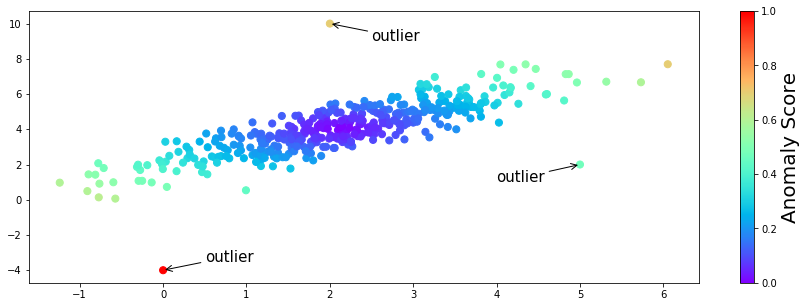

In [8]:
plt.figure(figsize = (15,5))
plt.scatter(X[:,0],X[:,1],s=50, c=scores, cmap=plt.cm.rainbow)
cbar = plt.colorbar()
cbar.set_label('Anomaly Score',fontsize=20)
plt.annotate('outlier', 
             xy = Xout[0],
             xytext = Xout[0]+[0.5,0.5],
             fontsize=15,
             arrowprops = dict(arrowstyle="->"))
plt.annotate('outlier', 
             xy = Xout[1],
             xytext = Xout[1]+[-1,-1],
             fontsize=15,
             arrowprops = dict(arrowstyle="->"))
plt.annotate('outlier', 
             xy = Xout[2],
             xytext = Xout[2]+[0.5,-1],
             fontsize=15,
             arrowprops = dict(arrowstyle="->"))             

Not a very good results. Notice that some inliers receive large anomaly scores (about 0.7), and that one of the outliers receives a low anomaly score (about 0.4).

We need an anomaly score function that takes into account the shape of the dataset. One such a function is

$$
\mbox{anomaly score of x} = 
\sqrt{
\begin{bmatrix} x_1-\mu_1 & x_2-\mu_2 & \cdots & x_n-\mu_n \end{bmatrix}
C^{-1}
\begin{bmatrix} x_1-\mu_1 \\ x_2-\mu_2 \\ \vdots \\ x_n-\mu_n \end{bmatrix}}
$$

where $C$ is the covariance matrix of the dataset (the covariance matrix takes into account that the features may be correlated).

In [9]:
def anomalyScores_covariance(X):    
    m,_ = X.shape
    cov = np.cov(X.T) # compute covariance matrix
    inv_cov = np.linalg.inv(cov) # inverse of the covariance matrix
    means = np.mean(X,axis=0)
    scores = np.array([np.sqrt((X[i]-means)@(inv_cov@(X[i]-means))) for i in range(m)])
    # scale the scores so that they are within a zero to one range
    scores = (scores-np.min(scores))/(np.max(scores)-np.min(scores))
    return scores

Let us compute the anomaly scores using the anomalyScores_covariance function.

In [10]:
scores = anomalyScores_covariance(X)

Text(2.5, 9.0, 'outlier')

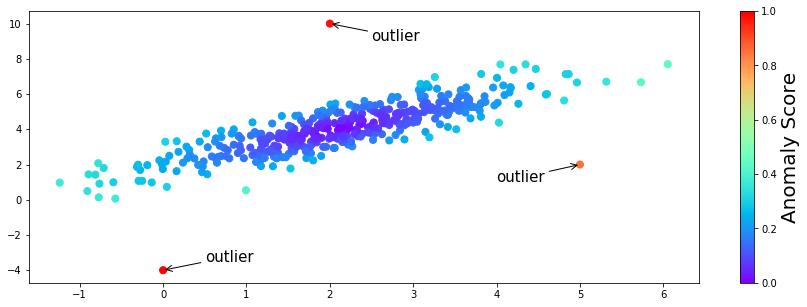

In [11]:
plt.figure(figsize = (15,5))
plt.scatter(X[:,0],X[:,1],s=50, c=scores, cmap=plt.cm.rainbow)
cbar = plt.colorbar()
cbar.set_label('Anomaly Score',fontsize=20)
plt.annotate('outlier', 
             xy = Xout[0],
             xytext = Xout[0]+[0.5,0.5],
             fontsize=15,
             arrowprops = dict(arrowstyle="->"))
plt.annotate('outlier', 
             xy = Xout[1],
             xytext = Xout[1]+[-1,-1],
             fontsize=15,
             arrowprops = dict(arrowstyle="->"))
plt.annotate('outlier', 
             xy = Xout[2],
             xytext = Xout[2]+[0.5,-1],
             fontsize=15,
             arrowprops = dict(arrowstyle="->"))             

A much better result. 
The outliers receive large anomaly scores and the inliers receive low anomaly scores

## Proximity-based Anomaly Score

Proximity-based methods identify anomalies as those points that are most distant from the other points.

Let us consider the following dataset with four outliers

Text(-1.0, 5.0, 'outlier')

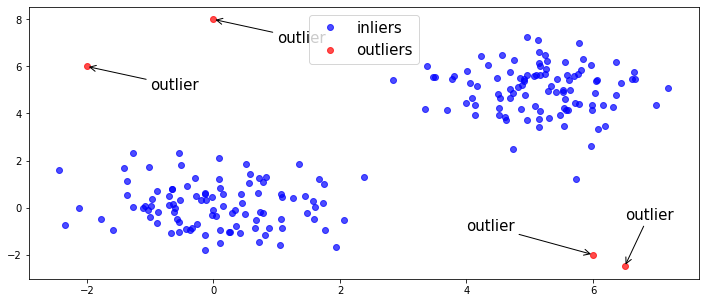

In [12]:
'toy dataset with 4 outliers'
# inliers
m = 100
Xin = np.zeros((2*m,2))
Xin[:100] = np.random.randn(m,2)
Xin[100:] = np.random.randn(m,2)+[5,5]
yin = np.zeros(2*m)
# outliers
Xout = np.array([[6,-2],[6.5,-2.5],[0,8],[-2,6]])
yout = np.ones(4)
# inliers + outliers
X = np.vstack((Xin,Xout))
y = np.concatenate((yin,yout))
# plot dataset
plt.figure(figsize = (12,5))
plt.plot(Xin[:,0],Xin[:,1],'bo',alpha=0.7, label='inliers') # plot inliears
plt.plot(Xout[:,0],Xout[:,1],'ro',alpha=0.7, label='outliers') # plot outliers
plt.legend(fontsize=15)
# annotate plot
plt.annotate('outlier', 
             xy = Xout[0],
             xytext = Xout[0]+[-2,1],
             fontsize=15,
             arrowprops = dict(arrowstyle="->"))
plt.annotate('outlier', 
             xy = Xout[1],
             xytext = Xout[1]+[0,2],
             fontsize=15,
             arrowprops = dict(arrowstyle="->"))
plt.annotate('outlier', 
             xy = Xout[2],
             xytext = Xout[2]+[1,-1],
             fontsize=15,
             arrowprops = dict(arrowstyle="->"))
plt.annotate('outlier', 
             xy = Xout[3],
             xytext = Xout[3]+[1,-1],
             fontsize=15,
             arrowprops = dict(arrowstyle="->"))

One of the simplest ways to define a proximity-based anomaly score of a point $x$ is to use the average distance to its first $k$-nearest neighbors.
The following function implements this idea.

In [13]:
def anomalyScores_proximity(X,k):
    from scipy.spatial import distance
    m,_ = X.shape
    dist = distance.squareform(distance.pdist(X)) # all pairwise distances
    neighbors = np.argsort(dist, axis=1)[:,1:k+1] # first k-nearest neighbors
    scores = np.array([np.mean(dist[i,neighbors[i]]) for i in range(m)]) # average distances 
    # scale the scores so that they are within a zero to one range
    scores = (scores-np.min(scores))/(np.max(scores)-np.min(scores))
    return scores

Let us compute the anomaly scores using the anomalyScores_proximity function with $k=5$.

In [14]:
scores = anomalyScores_proximity(X,5)

Text(-1.0, 5.0, 'outlier')

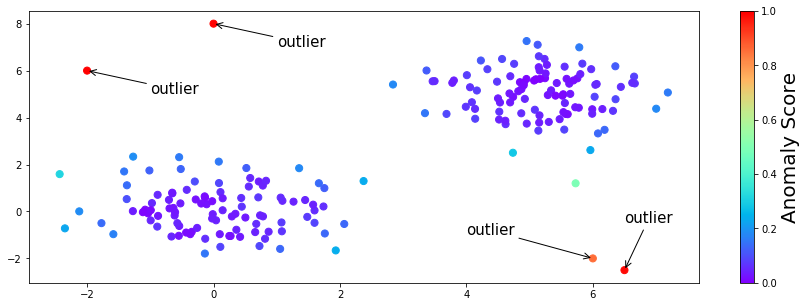

In [15]:
plt.figure(figsize = (15,5))
plt.scatter(X[:,0],X[:,1],s=50, c=scores, cmap=plt.cm.rainbow)
cbar = plt.colorbar()
cbar.set_label('Anomaly Score',fontsize=20)
# annotate plot
plt.annotate('outlier', 
             xy = Xout[0],
             xytext = Xout[0]+[-2,1],
             fontsize=15,
             arrowprops = dict(arrowstyle="->"))
plt.annotate('outlier', 
             xy = Xout[1],
             xytext = Xout[1]+[0,2],
             fontsize=15,
             arrowprops = dict(arrowstyle="->"))
plt.annotate('outlier', 
             xy = Xout[2],
             xytext = Xout[2]+[1,-1],
             fontsize=15,
             arrowprops = dict(arrowstyle="->"))
plt.annotate('outlier', 
             xy = Xout[3],
             xytext = Xout[3]+[1,-1],
             fontsize=15,
             arrowprops = dict(arrowstyle="->"))

The outliers receive large anomaly scores and the inliers receive low anomaly scores

## 12.3 - Density-based Methods

Proximity-based methods perform poorly in scenarios where the data contains regions of varying densities.
To illustrate this, let us consider the following dataset.

Text(4.0, 13.0, 'outlier')

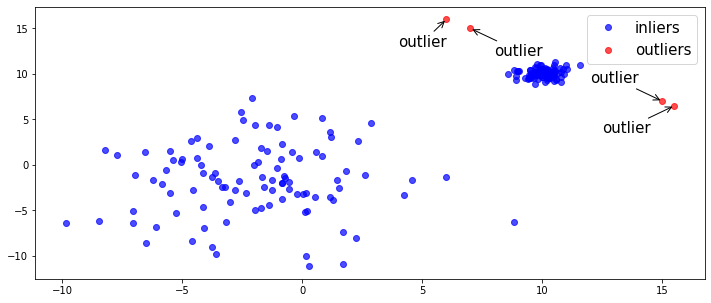

In [23]:
# inliers
m = 100
Xin = np.zeros((2*m,2))
Xin[:m] = 3.5*np.random.randn(m,2)+[-2,-2] # low density cluster
Xin[m:] = 0.5*np.random.randn(m,2)+[10,10] # high density cluster
yin = np.zeros(2*m)
# outliers
Xout = np.array([[15,7],[15.5,6.5],[7,15],[6,16]])
yout = np.ones(4)
# inliers + outliers
X = np.vstack((Xin,Xout))
y = np.concatenate((yin,yout))
# plot dataset
plt.figure(figsize = (12,5))
plt.plot(Xin[:,0],Xin[:,1],'bo',alpha=0.7, label='inliers') # plot inliears
plt.plot(Xout[:,0],Xout[:,1],'ro',alpha=0.7, label='outliers') # plot outliers
plt.legend(fontsize=15)
# annotate plot
plt.annotate('outlier', 
             xy = Xout[0],
             xytext = Xout[0]+[-3,2],
             fontsize=15,
             arrowprops = dict(arrowstyle="->"))
plt.annotate('outlier', 
             xy = Xout[1],
             xytext = Xout[1]+[-3,-3],
             fontsize=15,
             arrowprops = dict(arrowstyle="->"))
plt.annotate('outlier', 
             xy = Xout[2],
             xytext = Xout[2]+[1,-3],
             fontsize=15,
             arrowprops = dict(arrowstyle="->"))
plt.annotate('outlier', 
             xy = Xout[3],
             xytext = Xout[3]+[-2,-3],
             fontsize=15,
             arrowprops = dict(arrowstyle="->"))

The dataset contains two  clusters of normal points (blue) and 4 outliers (red). One of the clusters (bottom-left) has a  low density of points, and the other (top-right) has a large density of points.

Let us compute the anomaly scores using the anomalyScores_proximity function with  𝑘=5.

In [24]:
scores = anomalyScores_proximity(X,5)

Text(4.0, 13.0, 'outlier')

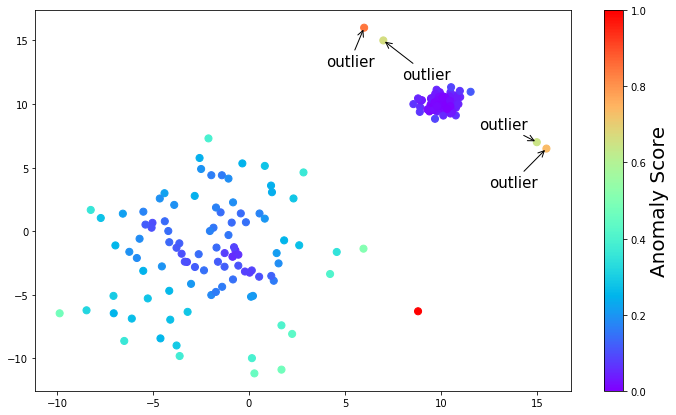

In [25]:
plt.figure(figsize = (12,7))
plt.scatter(X[:,0],X[:,1],s = 50, c=scores, cmap=plt.cm.rainbow)
cbar = plt.colorbar()
cbar.set_label('Anomaly Score',fontsize=20)
# annotate plot
plt.annotate('outlier', 
             xy = Xout[0],
             xytext = Xout[0]+[-3,1],
             fontsize=15,
             arrowprops = dict(arrowstyle="->"))
plt.annotate('outlier', 
             xy = Xout[1],
             xytext = Xout[1]+[-3,-3],
             fontsize=15,
             arrowprops = dict(arrowstyle="->"))
plt.annotate('outlier', 
             xy = Xout[2],
             xytext = Xout[2]+[1,-3],
             fontsize=15,
             arrowprops = dict(arrowstyle="->"))
plt.annotate('outlier', 
             xy = Xout[3],
             xytext = Xout[3]+[-2,-3],
             fontsize=15,
             arrowprops = dict(arrowstyle="->"))

Notice that some of the points in the low-density cluster receive large anomaly scores.
We need an anomaly score function that takes into account that the definition of "normal" may change across regions.

Let us denote by $\mathrm{dist}(x,k)$ the average distance to the first k-neighbors of a point $x$, and let us define the density of $x$ as

$$
\mathrm{density}(x,k)=\frac{1}{\mathrm{dist}(x,k)}
$$

If $y_1,y_2,\ldots,y_k$ are the $k$-nearest neighbors of $x$, an anomaly score that takes into account relative densities is

$$
\mbox{anomaly score of x}=\frac{\sum_{i=1}^k \mathrm{density}(y_i,k)/k}{\mathrm{density}(x,k)}
$$

The anomaly score of a point is high when the average density of points in its neighborhood is significantly higher than the density of the point.

In [19]:
def anomalyScores_density(X,k):
    from scipy.spatial import distance
    m,_ = X.shape
    dist = distance.squareform(distance.pdist(X))
    neighbors = np.argsort(dist, axis=1)[:,1:k+1]
    densities = 1/np.array([np.mean(dist[i,neighbors[i]]) for i in range(m)])
    scores = np.array([np.mean(densities[neighbors[i]])/(densities[i]) for i in range(m)])
    # scale the scores so that they are within a zero to one range
    scores = (scores-np.min(scores))/(np.max(scores)-np.min(scores))
    return scores

Let us compute the anomaly scores using the anomalyScores_density function with 𝑘=5.

In [859]:
scores = anomalyScores_density(X,5)

Text(4.0, 13.0, 'outlier')

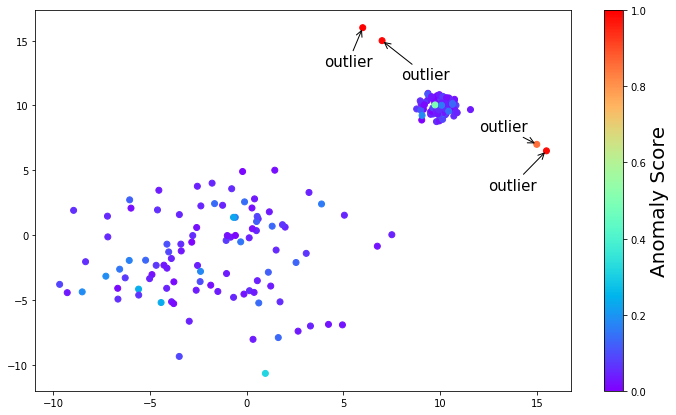

In [20]:
plt.figure(figsize = (12,7))
plt.scatter(X[:,0],X[:,1],c=scores, cmap=plt.cm.rainbow)
cbar = plt.colorbar()
cbar.set_label('Anomaly Score',fontsize=20)
# annotate plot
plt.annotate('outlier', 
             xy = Xout[0],
             xytext = Xout[0]+[-3,1],
             fontsize=15,
             arrowprops = dict(arrowstyle="->"))
plt.annotate('outlier', 
             xy = Xout[1],
             xytext = Xout[1]+[-3,-3],
             fontsize=15,
             arrowprops = dict(arrowstyle="->"))
plt.annotate('outlier', 
             xy = Xout[2],
             xytext = Xout[2]+[1,-3],
             fontsize=15,
             arrowprops = dict(arrowstyle="->"))
plt.annotate('outlier', 
             xy = Xout[3],
             xytext = Xout[3]+[-2,-3],
             fontsize=15,
             arrowprops = dict(arrowstyle="->"))

A much better result. The outliers receive large anomaly scores and the inliers receive low anomaly scores regardless of which cluster they are on.

## Reconstruction-based Anomaly Score

Reconstruction-based methods rely on the assumption that the normal class resides in a space of lower dimensionality than the original space.
In other words, there are patterns in the distribution of the normal class that can be captured by using dimensionality reduction techniques.
To illustrate it, let us consider the following (three-dimensional) dataset.

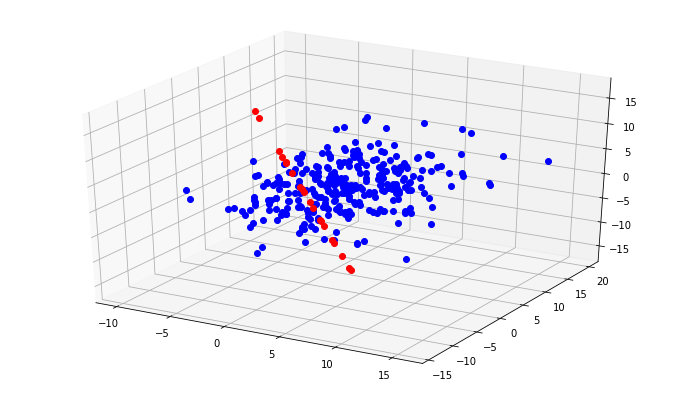

In [21]:
# build the 3d dataset
m = 300
w1, w2 = 0.1, 0.3
noise = 0.1
axes = [-1.8, 1.8, -1.3, 1.3, -1.0, 1.0]


# inliers
Xin = np.empty((m, 3))
Xin[:, 0] = 2-4*np.random.randn(m)
Xin[:, 1] = 3-6*np.random.randn(m)
Xin[:, 2] = Xin[:, 0] * w1 + Xin[:, 1] * w2 #+ noise * np.random.randn(m) # the z-components are almost a linear combination of the x and y components
yin = np.zeros(m)
# outliers
v = np.array([w1,w2,-1])
t = 20-40*np.random.rand(20,1)
Xout = v*t
yout = np.ones(20)

X = np.vstack((Xin,Xout))
y = np.concatenate((yin,yout))

# plot the dataset
from mpl_toolkits.mplot3d import proj3d
plt.figure(figsize=(12,7))
ax = plt.axes(projection='3d')
plt.plot(Xin[:,0],Xin[:,1],Xin[:,2],'bo')
plt.plot(Xout[:,0],Xout[:,1],Xout[:,2],'ro')


The normal points (in blue) lie close to a plane, the outliers (in red) lie on a line that passes through that plane

The following anomaly score function is based on the PCA.
First, it computes the principal components of the dataset.
Then, it tries to reconstruct the dataset using the first k principal components.
The anomaly score is the distance from a point to its reconstruction based on the first k principal components.

In [22]:
def anomalyScore_PCA(X,k):
    'scale the dataset'
    means = np.mean(X,axis=0)
    stds = np.std(X,axis=0)
    X_scaled = (X-means)/stds
    'compute the singular value decomposition'
    _,_,v = np.linalg.svd(X_scaled,full_matrices=False) # singular value decomposition
    'reconstruct X_scaled based on the first k principal components'
    X_reconstructed = (X_scaled@v[:k].T)@v[:k]
    'compute anomaly scores'
    scores = np.linalg.norm(X_scaled-X_reconstructed,axis=1)
    scores = (scores-np.min(scores))/(np.max(scores)-np.min(scores))
    return scores

Let us compute the anomaly scores using the anomalyScores_PCA function with 𝑘=2 (i.e., using two principal components).

In [882]:
scores = anomalyScore_PCA(X,2)

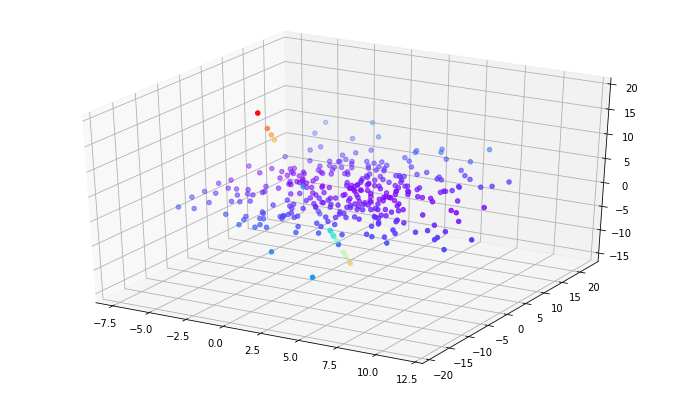

In [895]:
plt.figure(figsize=(12,7))
ax = plt.axes(projection='3d')
ax.scatter(X[:,0],X[:,1],X[:,2], c=scores, cmap=plt.cm.rainbow)

Maybe is better if we just plot the anomaly score of all the dataset points (300 inliers+20 outliers) using two different colors (blue for inliers, red for outliers).

Text(0, 0.5, 'Anomaly Score')

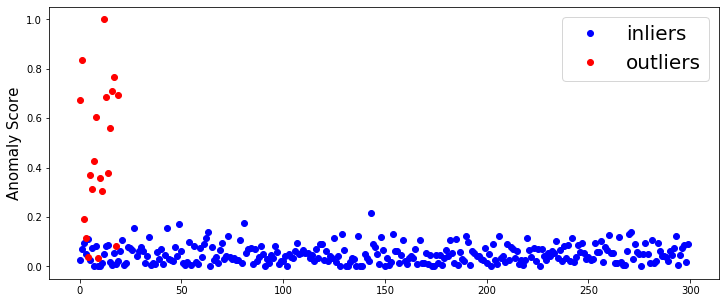

In [888]:
plt.figure(figsize=(12,5))
colors = ['blue','red']
labels = ['inliers','outliers']
for i in range(2):
    plt.plot(scores[y==i],'o',color=colors[i], label=labels[i])
plt.legend(fontsize=20)
plt.ylabel('Anomaly Score', fontsize=15)

Notice that most of the outliers receive large anomaly scores.